In [3]:
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

Tamanho total de arquivos 4053
Shape da imagem (854, 519, 3)


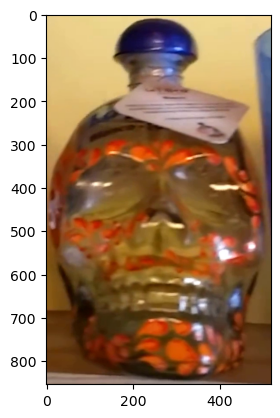

Tamanho da imagem:  (854, 519, 3)


array([[230, 208, 141],
       [230, 208, 141],
       [231, 207, 141],
       ...,
       [244, 213, 149],
       [244, 213, 149],
       [244, 213, 149]], dtype=uint8)

In [5]:
path = 'fotos/'

# files = [f for f in listdir(path) if isfile(join(path, f))]
files = []

for file in listdir(path):
  if isfile(join(path, file)):
    files.append(file)

print('Tamanho total de arquivos {}'.format(len(files)))

Figure = Image.open(path + files[4])
data = image.imread(path + files[4])
print('Shape da imagem {}'.format(data.shape))

plt.imshow(Figure)
plt.show()

# Convertendo um objeto do tipo imagem para um array numpy
data = np.asarray(Figure)

print('Tamanho da imagem: ',data.shape)

data[1]

In [6]:
dataFigures = []

for f in range(1, 1000):
  filepath = path + files[f]
  if(isfile(filepath) == True):
    try:    
      Figure = Image.open(filepath).resize((100,200))
      dataFigures.append(np.asarray(Figure))
      print('Tamanho das imagens: ',Figure.size)    
    except:
      pass

Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho das imagens:  (100, 200)
Tamanho da

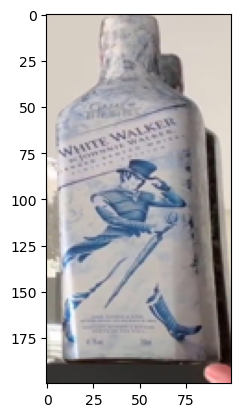

In [7]:
plt.imshow(dataFigures[16])
plt.show()

Shape da imagem (200, 100, 3)


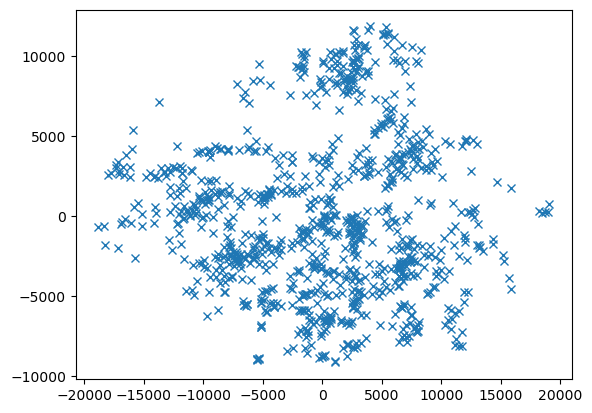

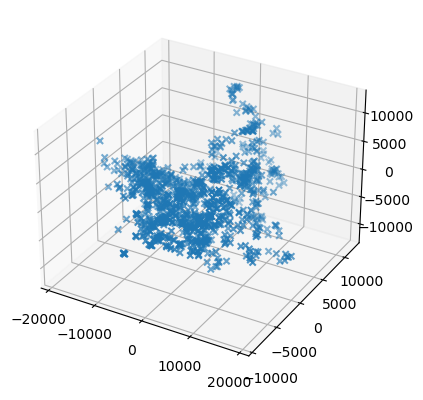

In [9]:
dataShape = dataFigures[1].shape
print('Shape da imagem {}'.format(dataShape))

X = []

for dataFigure in dataFigures:
  X.append(dataFigure.reshape((dataShape[0]*dataShape[1]*dataShape[2])))
# PCA em 2 componentes
pca = PCA(n_components=2)
y = pca.fit_transform(np.asarray(X))
plt.plot(y[:,0],y[:,1],'x')

# PCA em 3 componentes
pca = PCA(n_components=3)
y = pca.fit_transform(np.asarray(X))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = y[:,0]
ys = y[:,1]
zs = y[:,2]
ax.scatter(xs, ys, zs, marker='x')

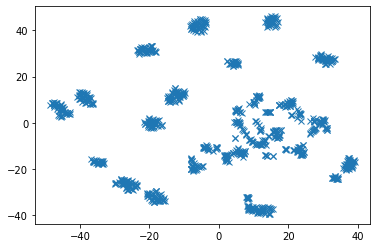

In [ ]:
tsne = TSNE(n_components=2)
y = tsne.fit_transform(np.asarray(X))

plt.plot(y[:,0],y[:,1],'x')

/Users/thiago/opt/mambaforge/envs/Database/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/9c/71h41_7x5cx63p1c0h9bnlsm0000gn/T/ipykernel_1159/4213011349.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(s,s,i+1)


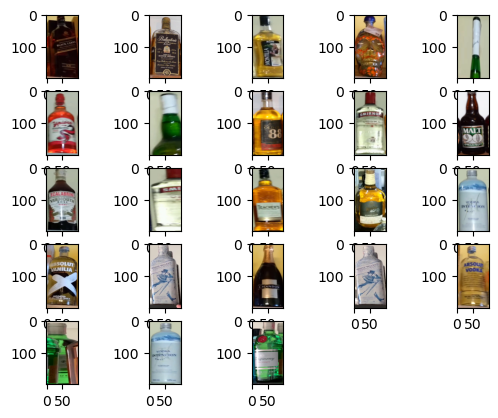

In [10]:
kmeans = KMeans(n_clusters=36, random_state=0).fit(y)
kLabels = kmeans.labels_

rotulados = {}

for i,label in zip(range(len(kLabels)),kLabels):
  if not (label in rotulados):
    rotulados[label] = [] 
  rotulados[label].append(dataFigures[i])

for rotulado in rotulados.values():
  n = len(rotulado)
  s = int(1+np.sqrt(n))
  for i in range(n):
    plt.subplot(s,s,i+1)
    plt.imshow(dataFigures[i])

In [ ]:
for rotulado in rotulados.values():
  n = len(rotulado)
  s = int(1+np.sqrt(n))
  plt.rcParams["figure.figsize"]=20,20
  plt.figure()
  for i in range(n):
    plt.subplot(s,s,i+1)
    plt.imshow(rotulado[i])

In [ ]:
print(rotulados)

{28: [array([[[214, 206, 195],
        [214, 206, 195],
        [214, 206, 195],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       [[213, 205, 194],
        [213, 205, 194],
        [213, 205, 194],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       [[213, 205, 194],
        [213, 205, 194],
        [213, 205, 194],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       ...,

       [[162, 145, 129],
        [144, 127, 112],
        [138, 120, 107],
        ...,
        [150, 142, 137],
        [148, 141, 132],
        [132, 125, 115]],

       [[ 74,  64,  60],
        [ 73,  62,  59],
        [ 73,  61,  60],
        ...,
        [150, 143, 140],
        [168, 161, 156],
        [173, 165, 160]],

       [[ 67,  59,  60],
        [ 67,  59,  60],
        [ 65,  57,  57],
        ...,
        [141, 134, 132],
        [150, 142, 141],
        [150, 141,

In [ ]:
print(rotulados)

{28: [array([[[214, 206, 195],
        [214, 206, 195],
        [214, 206, 195],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       [[213, 205, 194],
        [213, 205, 194],
        [213, 205, 194],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       [[213, 205, 194],
        [213, 205, 194],
        [213, 205, 194],
        ...,
        [214, 206, 195],
        [214, 206, 195],
        [214, 206, 195]],

       ...,

       [[162, 145, 129],
        [144, 127, 112],
        [138, 120, 107],
        ...,
        [150, 142, 137],
        [148, 141, 132],
        [132, 125, 115]],

       [[ 74,  64,  60],
        [ 73,  62,  59],
        [ 73,  61,  60],
        ...,
        [150, 143, 140],
        [168, 161, 156],
        [173, 165, 160]],

       [[ 67,  59,  60],
        [ 67,  59,  60],
        [ 65,  57,  57],
        ...,
        [141, 134, 132],
        [150, 142, 141],
        [150, 141,

In [ ]:
print(y.shape)

(998, 2)


In [1]:
dataFigures[1]
Media = []

for d in dataFigures:
  Media.append(d.mean())


plt.hist(Media)



NameError: name 'dataFigures' is not defined